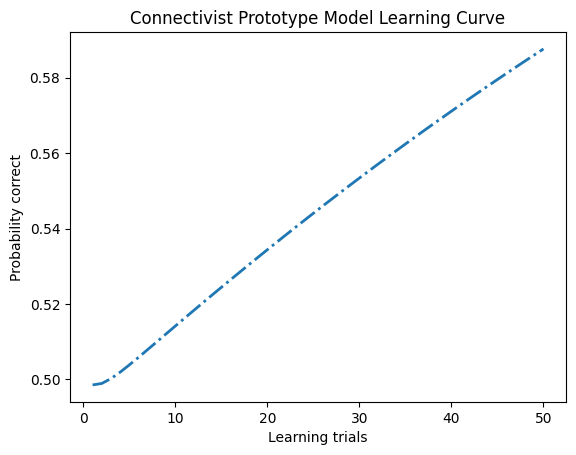

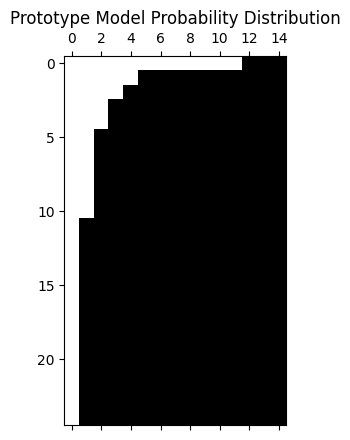

Proportion of correct patterns: 0.8586666666666667


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from files
def load_data():
    XAC_1 = np.loadtxt('XAC_1.txt')
    XAC_2 = np.loadtxt('XAC_2.txt')
    XBC_1 = np.loadtxt('XBC_1.txt')
    XBC_2 = np.loadtxt('XBC_2.txt')
    stimuli1 = np.load('stimuli1.npy', allow_pickle=True).item()
    stimuli2 = np.load('stimuli2.npy', allow_pickle=True).item()
    return XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2

def inout(I1, I2, X, W, sig, st):
    """ Compute input and output activations. """
    N = (len(I1) + len(I2))  # Ensure compatibility with W

    in1 = 1.0 / np.exp(((I1 - X[st, 0]) / sig) ** 2)  # Similarity for s1
    in1 = in1 / np.sum(in1)  # Normalize
    in2 = 1.0 / np.exp(((I2 - X[st, 1]) / sig) ** 2)  # Similarity for s2
    in2 = in2 / np.sum(in2) # Normalize
    
    #in1 = np.exp(-((I1 - X[st, 0]) / sig) ** 2)
    #in2 = np.exp(-((I2 - X[st, 0]) / sig) ** 2)

    In = np.concatenate((in1, in2))  # Flatten into a single vector

    In = In.reshape((-1, 1))  # Reshape to match matrix multiplication
    Out = W @ In  # Compute output activations

    return In, Out

def prototype(alf, b, sig, XAC, XBC, P, nr, cutoff):
    """ Prototype learning model with input-output computations. """
    ns = XAC.shape[0]  # Number of stimuli
    Max = int(np.max(XAC))
    I1 = np.arange(Max + 1)
    I2 = np.arange(Max + 1)

    # Initialize weight matrix for 2 categories
    W = np.zeros((2, (Max + 1) * 2))

    # Initialize results
    T = np.zeros((nr, 4))
    mT = np.zeros(nr)

    for rep in range(nr):
        # Compute prototype for each category
        protoA = np.mean(XAC, axis=0)
        protoB = np.mean(XBC, axis=0)

        for st in range(ns):
            # Update weights for category A
            In, Out = inout(I1, I2, XAC, W, sig, st)
            WA = alf * (np.array([1, 0])[:, None] - Out) @ In.T
            W += WA

            # Update weights for category B
            In, Out = inout(I1, I2, XBC, W, sig, st)
            WB = alf * (np.array([0, 1])[:, None] - Out) @ In.T
            W += WB

        # Transfer test
        for st in range(4):
            _, Out = inout(I1, I2, P, W, sig, st)
            p = np.exp(b * Out)
            p = p[0] / np.sum(p)

            if st in [1, 2]:  # Category A
                T[rep, st] = p.item()
            else:  # Category B
                T[rep, st] = p.item()

        # Test prediction
        mT[rep] = ((T[rep, 1] - T[rep, 0]) > cutoff) and ((T[rep, 2] - T[rep, 3]) > cutoff)

    return mT, T

# Main program
def main():
    # Load data
    XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2 = load_data()
        
    XAC = XAC_2  # Use stimuli 2
    XBC = XBC_2  # Use stimuli 2
    P = stimuli2['P']  # Ensure correct stimuli set is used

#     XAC = XAC_1  # Use stimuli 1
#     XBC = XBC_1  # Use stimuli 1
#     P = stimuli1['P']  # Ensure correct stimuli set is used

    # Hyperparameters
    nr = 50
    aa = 25
    AV = np.arange(1, aa + 1) / aa
    bb = 15
    BV = np.arange(1, bb + 1)
    MT = np.zeros((aa, bb))
    sig = 5
    cutoff = 0.2

    # Single parameter setting
    alf = 0.1
    b = 2.5

    # Train prototype model
    Mt, Pc = prototype(alf, b, sig, XAC, XBC, P, nr, cutoff)

    # Plot learning curve
    plt.figure()
    plt.plot(range(1, nr + 1), (Pc[:, 1] + Pc[:, 2]) / 2, '-.', linewidth=2)
    plt.xlabel('Learning trials')
    plt.ylabel('Probability correct')
    plt.title('Connectivist Prototype Model Learning Curve')
    plt.show()

    # Loop through predictions for parameter sweeps
    for i in range(aa):
        for j in range(bb):
            alf = AV[i]
            b = BV[j]
            mT, _ = prototype(alf, b, sig, XAC, XBC, P, nr, cutoff)
            MT[i, j] = mT[-1]

    # Plot probability distribution
    plt.figure()
    plt.spy(MT)
    plt.title('Prototype Model Probability Distribution')
    plt.show()

    # Compute final proportion of correct patterns
    pcp = np.sum(MT == 1) / (MT.shape[0] * MT.shape[1])
    print('Proportion of correct patterns:', pcp)

if __name__ == "__main__":
    main()

Iteration 1, alpha=0.100: ΔW = 0.85289
Iteration 2, alpha=0.100: ΔW = 0.43288
Iteration 3, alpha=0.100: ΔW = 0.22028
Iteration 4, alpha=0.100: ΔW = 0.11304
Iteration 5, alpha=0.100: ΔW = 0.05958
Iteration 6, alpha=0.100: ΔW = 0.03387
Iteration 7, alpha=0.100: ΔW = 0.02254
Iteration 8, alpha=0.100: ΔW = 0.01812
Iteration 9, alpha=0.100: ΔW = 0.01647
Iteration 10, alpha=0.100: ΔW = 0.01577
Iteration 11, alpha=0.100: ΔW = 0.01541
Iteration 12, alpha=0.100: ΔW = 0.01518
Iteration 13, alpha=0.100: ΔW = 0.01502
Iteration 14, alpha=0.100: ΔW = 0.01490
Iteration 15, alpha=0.100: ΔW = 0.01481
Iteration 16, alpha=0.100: ΔW = 0.01474
Iteration 17, alpha=0.100: ΔW = 0.01468
Iteration 18, alpha=0.100: ΔW = 0.01463
Iteration 19, alpha=0.100: ΔW = 0.01458
Iteration 20, alpha=0.100: ΔW = 0.01454
Iteration 21, alpha=0.100: ΔW = 0.01450
Iteration 22, alpha=0.100: ΔW = 0.01447
Iteration 23, alpha=0.100: ΔW = 0.01444
Iteration 24, alpha=0.100: ΔW = 0.01440
Iteration 25, alpha=0.100: ΔW = 0.01437
Iteration

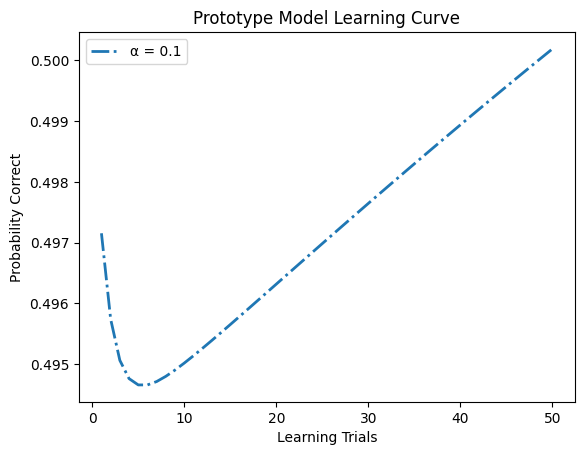

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from files
def load_data():
    XAC_1 = np.loadtxt('XAC_1.txt')
    XAC_2 = np.loadtxt('XAC_2.txt')
    XBC_1 = np.loadtxt('XBC_1.txt')
    XBC_2 = np.loadtxt('XBC_2.txt')
    stimuli1 = np.load('stimuli1.npy', allow_pickle=True).item()
    stimuli2 = np.load('stimuli2.npy', allow_pickle=True).item()
    return XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2

def inout(I1, I2, X, W, sig, st):
    """ Compute input and output activations. """
    in1 = 1.0 / np.exp(((I1 - X[st, 0]) / sig) ** 2)
    in1 = in1 / (np.sum(in1) + 1e-10)  # Normalize, prevent division by zero
    in2 = 1.0 / np.exp(((I2 - X[st, 1]) / sig) ** 2)
    in2 = in2 / (np.sum(in2) + 1e-10)  # Normalize

    In = np.concatenate((in1, in2)).reshape((-1, 1))
    Out = W @ In  # Compute output activations
    return In, Out

def prototype(alf, b, sig, XAC, XBC, P, nr, cutoff):
    """ Prototype learning model with debugging """
    ns = XAC.shape[0]
    Max = int(np.max(XAC))
    I1, I2 = np.arange(Max + 1), np.arange(Max + 1)

    W = np.zeros((2, (Max + 1) * 2))  # Initialize weights
    prev_W = np.copy(W)  # Store previous weights for delta calculation
    Pc_history = []  # Store probability correct history for trend analysis

    T = np.zeros((nr, 4))
    mT = np.zeros(nr)

    for rep in range(nr):
        # Compute prototypes
        protoA, protoB = np.mean(XAC, axis=0), np.mean(XBC, axis=0)

        for st in range(ns):
            In, Out = inout(I1, I2, XAC, W, sig, st)
            WA = alf * (np.array([1, 0])[:, None] - Out) @ In.T
            W += WA

            In, Out = inout(I1, I2, XBC, W, sig, st)
            WB = alf * (np.array([0, 1])[:, None] - Out) @ In.T
            W += WB

        ΔW = np.linalg.norm(W - prev_W)  # Compute weight change
        prev_W = np.copy(W)  # Update stored weights

        # Debug: Print W changes
        print(f"Iteration {rep+1}, alpha={alf:.3f}: ΔW = {ΔW:.5f}")

        # Transfer test
        for st in range(4):
            _, Out = inout(I1, I2, P, W, sig, st)
            p = np.exp(b * (Out - np.max(Out)))  # Prevent overflow
            p = (p[0] / np.sum(p)).item()  # Ensure `p` is a scalar

            # Store probability
            T[rep, st] = p

        # Compute Probability Correct
        Pc = (T[:, 1] + T[:, 2]) / 2  # Correct predictions
        Pc_history.append(Pc[rep])  # Store in history

        # Check for probability drop using the slope of last 3 iterations
        if rep >= 3:
            recent_slope = np.polyfit(range(3), Pc_history[-3:], 1)[0]  # Fit a linear slope
            if recent_slope < -0.05:  # Threshold for downward trend
                print(f"⚠️ Warning: Downward probability slope detected at iteration {rep+1}, alpha={alf:.3f}: Slope = {recent_slope:.5f}")

    return mT, T, Pc

# Main program
def main():
    XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2 = load_data()
    
    # Select stimuli1 (change to stimuli2 to test both)
    XAC, XBC, P = XAC_1, XBC_1, stimuli1['P']
    
    # Hyperparameters
    nr = 50
    alf = 0.1  # Low alpha for debugging
    b = 2.5
    sig = 5
    cutoff = 0.2

    # Train prototype model
    mT, T, Pc = prototype(alf, b, sig, XAC, XBC, P, nr, cutoff)

    # Plot learning curve
    plt.figure()
    plt.plot(range(1, nr + 1), Pc, '-.', linewidth=2, label=f"α = {alf}")
    plt.xlabel("Learning Trials")
    plt.ylabel("Probability Correct")
    plt.title("Prototype Model Learning Curve")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
